In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data = pd.read_csv('auto-mpg.csv',index_col='car name')

In [4]:
print(data.head())
print(data.index)
print(data.columns)


                            mpg  cylinders  displacement horsepower  weight  \
car name                                                                      
chevrolet chevelle malibu  18.0          8         307.0        130    3504   
buick skylark 320          15.0          8         350.0        165    3693   
plymouth satellite         18.0          8         318.0        150    3436   
amc rebel sst              16.0          8         304.0        150    3433   
ford torino                17.0          8         302.0        140    3449   

                           acceleration  model year  origin  
car name                                                     
chevrolet chevelle malibu          12.0          70       1  
buick skylark 320                  11.5          70       1  
plymouth satellite                 11.0          70       1  
amc rebel sst                      12.0          70       1  
ford torino                        10.5          70       1  
Index([u'che

In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
ford galaxie 500,15.0,8,429.0,198,4341,10.0,70,1
chevrolet impala,14.0,8,454.0,220,4354,9.0,70,1
plymouth fury iii,14.0,8,440.0,215,4312,8.5,70,1
pontiac catalina,14.0,8,455.0,225,4425,10.0,70,1


In [7]:

print(data)

                                    mpg  cylinders  displacement horsepower  \
car name                                                                      
chevrolet chevelle malibu          18.0          8         307.0        130   
buick skylark 320                  15.0          8         350.0        165   
plymouth satellite                 18.0          8         318.0        150   
amc rebel sst                      16.0          8         304.0        150   
ford torino                        17.0          8         302.0        140   
ford galaxie 500                   15.0          8         429.0        198   
chevrolet impala                   14.0          8         454.0        220   
plymouth fury iii                  14.0          8         440.0        215   
pontiac catalina                   14.0          8         455.0        225   
amc ambassador dpl                 15.0          8         390.0        190   
dodge challenger se                15.0          8  

In [8]:
data.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1
ford ranger,28.0,4,120.0,79,2625,18.6,82,1
chevy s-10,31.0,4,119.0,82,2720,19.4,82,1


    1. mpg:           continuous                         расход топлива
    2. cylinders:     multi-valued discrete              количество цилиндров в двигателе
    3. displacement:  continuous                         объем двигателя
    4. horsepower:    continuous                         мощность двигателя
    5. weight:        continuous                         масса пустого автомобиля
    6. acceleration:  continuous                         разгон от 0 до 60 миль в час                    
    7. model year:    multi-valued discrete              модельный год
    8. origin:        multi-valued discrete              регион происхождения, 1 - США, 2 - Европа, 3 - Япония
    9. car name:      string (unique for each instance)

Стоит задача предсказания расхода топлива (в милях, которые можно проехать на галлоне топлива, miles per gallon, величина в некотором смысле обратная привычным нам литрам на 100 км) по разным параметрам автомобиля, описанным выше.

In [9]:
data.at['vw pickup', 'weight']


2130

In [10]:
type(data['weight']['vw pickup'])

numpy.int64

In [11]:
type(data['weight'])

pandas.core.series.Series

In [12]:
data[['cylinders', 'mpg']].head()

,cylinders,mpg
car name,,
chevrolet chevelle malibu,8,18.0
buick skylark 320,8,15.0
plymouth satellite,8,18.0
amc rebel sst,8,16.0
ford torino,8,17.0


In [13]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


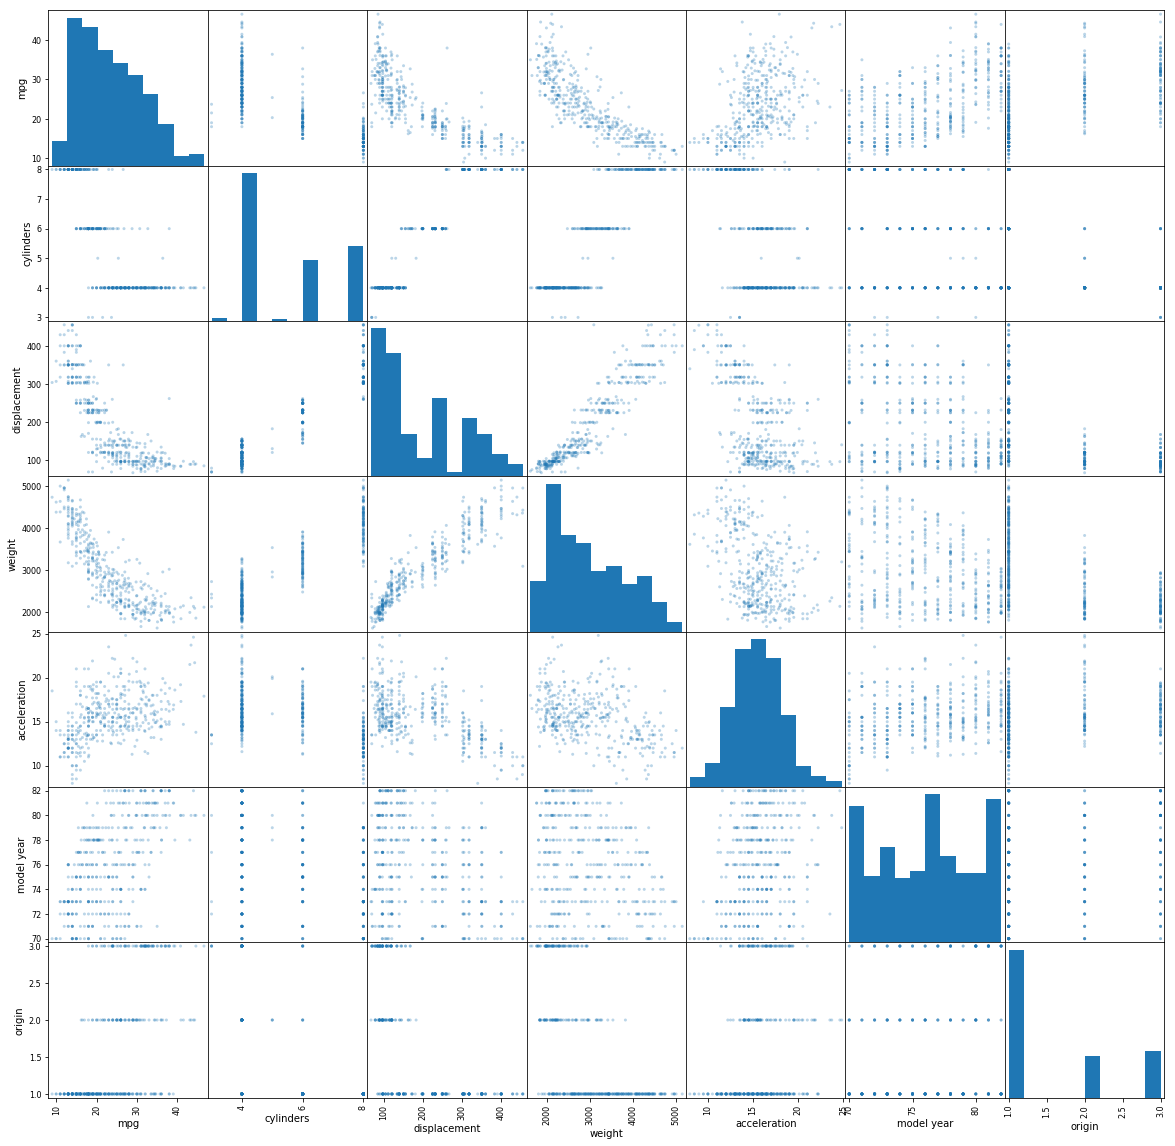

In [14]:

from pandas.tools.plotting import scatter_matrix
scatter_matrix(data, alpha = .3, figsize = (20, 20))
pass

In [15]:
data.corr()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


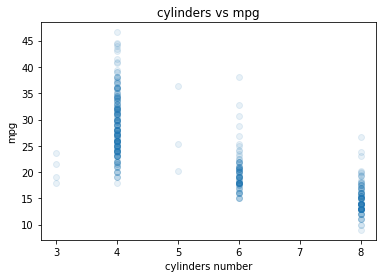

In [16]:
plt.plot(data['cylinders'], data['mpg'], 'o', alpha = 0.1)
plt.xlabel('cylinders number')
plt.ylabel('mpg')
plt.title('cylinders vs mpg')
pass

Как мы можем видеть, больше цилиндров скорее всего означает больший расход топлива

In [17]:
data['mpg'] <= 19

car name
chevrolet chevelle malibu             True
buick skylark 320                     True
plymouth satellite                    True
amc rebel sst                         True
ford torino                           True
ford galaxie 500                      True
chevrolet impala                      True
plymouth fury iii                     True
pontiac catalina                      True
amc ambassador dpl                    True
dodge challenger se                   True
plymouth 'cuda 340                    True
chevrolet monte carlo                 True
buick estate wagon (sw)               True
toyota corona mark ii                False
plymouth duster                      False
amc hornet                            True
ford maverick                        False
datsun pl510                         False
volkswagen 1131 deluxe sedan         False
peugeot 504                          False
audi 100 ls                          False
saab 99e                             False
bm

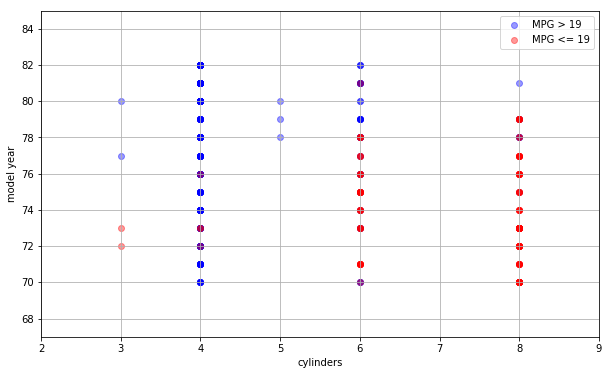

In [18]:

plt.figure(figsize = (10, 6))

plt.scatter(data[data['mpg'] > 19]['cylinders'],
            data[data['mpg'] > 19]['model year'],
            alpha = 0.4,
            label = 'MPG > 19',
            color = 'b')

plt.scatter(data[data['mpg'] <= 19]['cylinders'],
            data[data['mpg'] <= 19]['model year'],
            alpha = 0.4,
            label = 'MPG <= 19',
            color = 'r')

plt.xlabel('cylinders')
plt.xticks(range(10))
plt.xlim(2, 9)
plt.ylim(67, 85)
plt.ylabel('model year')
plt.legend()
plt.grid()

Можно видеть что обычно, чем новее машина, тем меньше расходует топлива, что логично, технологии на месте не стоят

Text(0.5,1,'cylinders and model year')

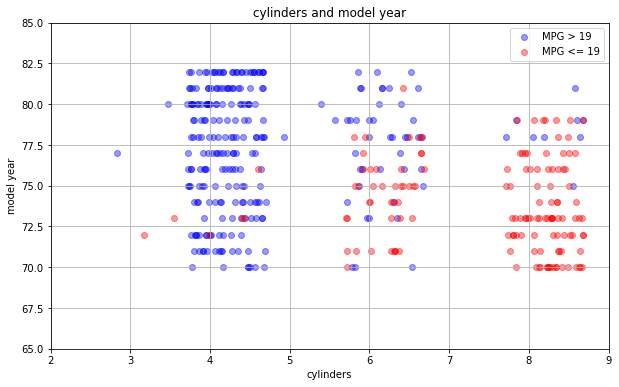

In [19]:
np.random.seed(0)
mpg_rnd = data['cylinders'] + np.random.rand(data.shape[0]) -.3

plt.figure(figsize = (10, 6))

plt.scatter(mpg_rnd[data['mpg'] > 19],
            data[data['mpg'] > 19]['model year'],
            alpha = 0.4,
            label = 'MPG > 19',
            color = 'b')

plt.scatter(mpg_rnd[data['mpg'] <= 19],
            data[data['mpg'] <= 19]['model year'],
            alpha = 0.4,
            label = 'MPG <= 19',
            color = 'r')

plt.xlabel('cylinders')
plt.xticks(range(10))
plt.xlim(2, 9)
plt.ylim(65, 85)
plt.ylabel('model year')
plt.legend()
plt.grid()
plt.title('cylinders and model year')

In [20]:
data.describe(include = ['object'])

,horsepower
count,398
unique,94
top,150
freq,22


In [21]:
data.describe(include = 'all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000


In [22]:
data['origin'].unique()

array([1, 3, 2], dtype=int64)

# Задача

Потренируемся выбрасывать некоторые данные из датасета, на самом деле они пригодятся, поэтому датасет не изменяется

In [23]:
data.drop(['displacement','horsepower'], axis = 1) 

,mpg,cylinders,weight,acceleration,model year,origin
car name,,,,,,
chevrolet chevelle malibu,18.0,8,3504,12.0,70,1
buick skylark 320,15.0,8,3693,11.5,70,1
plymouth satellite,18.0,8,3436,11.0,70,1
amc rebel sst,16.0,8,3433,12.0,70,1
ford torino,17.0,8,3449,10.5,70,1
ford galaxie 500,15.0,8,4341,10.0,70,1
chevrolet impala,14.0,8,4354,9.0,70,1
plymouth fury iii,14.0,8,4312,8.5,70,1
pontiac catalina,14.0,8,4425,10.0,70,1


# Готовим данные

Будем решать задачу классификации по тому, сколько можно проехать на одном галлоне топлива

In [24]:
#set up bins
#use pd.cut function can attribute the values into its specific bins
category = pd.cut(data['mpg'], 2, labels=["bad", "good"])
data['mpg_category'] = category
data['mpg_category'] = data['mpg_category'].astype('object')
data = data.drop('mpg', 1)

In [25]:
data

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,mpg_category
car name,,,,,,,,
chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,1,bad
buick skylark 320,8,350.0,165,3693,11.5,70,1,bad
plymouth satellite,8,318.0,150,3436,11.0,70,1,bad
amc rebel sst,8,304.0,150,3433,12.0,70,1,bad
ford torino,8,302.0,140,3449,10.5,70,1,bad
ford galaxie 500,8,429.0,198,4341,10.0,70,1,bad
chevrolet impala,8,454.0,220,4354,9.0,70,1,bad
plymouth fury iii,8,440.0,215,4312,8.5,70,1,bad
pontiac catalina,8,455.0,225,4425,10.0,70,1,bad


In [26]:
data['horsepower'].dtype.name

'object'

In [27]:
data['mpg_category'].dtype.name

'object'

In [28]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['horsepower', 'mpg_category']
['cylinders', 'displacement', 'weight', 'acceleration', 'model year', 'origin']


In [29]:
for c in categorical_columns:
    print(c, data[c].unique())

('horsepower', array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object))
('mpg_category', array(['bad', 'good'], dtype=object))


Видим пропущенные значения, надо будет починить

In [30]:
data.median(axis = 0)

cylinders          4.0
displacement     148.5
weight          2803.5
acceleration      15.5
model year        76.0
origin             1.0
dtype: float64

In [31]:
data.median(axis = 1)

car name
chevrolet chevelle malibu            41.00
buick skylark 320                    40.75
plymouth satellite                   40.50
amc rebel sst                        41.00
ford torino                          40.25
ford galaxie 500                     40.00
chevrolet impala                     39.50
plymouth fury iii                    39.25
pontiac catalina                     40.00
amc ambassador dpl                   39.25
dodge challenger se                  40.00
plymouth 'cuda 340                   39.00
chevrolet monte carlo                39.75
buick estate wagon (sw)              40.00
toyota corona mark ii                42.50
plymouth duster                      42.75
amc hornet                           42.75
ford maverick                        43.00
datsun pl510                         42.25
volkswagen 1131 deluxe sedan         45.25
peugeot 504                          43.75
audi 100 ls                          42.25
saab 99e                             43.75
bm

# Работа с пропущенными значениями

"Заполняем" пропущенные значения численных данных (на самом деле их нет)

In [32]:
data = data.fillna(data.median(axis = 0), axis = 0)

In [33]:
data[numerical_columns].count(axis = 0)

cylinders       398
displacement    398
weight          398
acceleration    398
model year      398
origin          398
dtype: int64

In [34]:
data[categorical_columns].count(axis = 0)

horsepower      398
mpg_category    398
dtype: int64

In [35]:
data['weight'].describe()

count     398.000000
mean     2970.424623
std       846.841774
min      1613.000000
25%      2223.750000
50%      2803.500000
75%      3608.000000
max      5140.000000
Name: weight, dtype: float64

In [36]:
type(data['weight'].describe())

pandas.core.series.Series

In [37]:
data.describe(include = [object])

,horsepower,mpg_category
count,398,398
unique,94,2
top,150,bad
freq,22,279


In [38]:
data['horsepower'].describe().top

'150'

Заполняем пропущенные значения для мощности, выбираем для этого самый популярный вариант

In [39]:
def is_number(s):
    try:
        int(s)
        return True
    except ValueError:
        return False
data['horsepower']
for i in range(len(data['horsepower'])):
    #print data['horsepower'][i]
    if not is_number(data['horsepower'][i]):
        data['horsepower'][i] = data['horsepower'].describe().top

In [40]:
data['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [41]:
data_describe = data.describe(include = [object])

# Векторизация 

Нужно что-то сделать с категориальными (номинальными) признаками



In [42]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

(['mpg_category'], ['horsepower'])


In [43]:
data['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

Скорее всего, будет лучше если мы преобразуем можность в contigous столбец, но для тренировки попробуем бинаризовать эти данные

In [44]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index([u'horsepower_100', u'horsepower_102', u'horsepower_103',
       u'horsepower_105', u'horsepower_107', u'horsepower_108',
       u'horsepower_110', u'horsepower_112', u'horsepower_113',
       u'horsepower_115', u'horsepower_116', u'horsepower_120',
       u'horsepower_122', u'horsepower_125', u'horsepower_129',
       u'horsepower_130', u'horsepower_132', u'horsepower_133',
       u'horsepower_135', u'horsepower_137', u'horsepower_138',
       u'horsepower_139', u'horsepower_140', u'horsepower_142',
       u'horsepower_145', u'horsepower_148', u'horsepower_149',
       u'horsepower_150', u'horsepower_152', u'horsepower_153',
       u'horsepower_155', u'horsepower_158', u'horsepower_160',
       u'horsepower_165', u'horsepower_167', u'horsepower_170',
       u'horsepower_175', u'horsepower_180', u'horsepower_190',
       u'horsepower_193', u'horsepower_198', u'horsepower_200',
       u'horsepower_208', u'horsepower_210', u'horsepower_215',
       u'horsepower_220', u'horsepower_2

# Нормализация количественных признаков

Многие алгоритмы машинного обучения чувствительны к масштабированию данных. К таким алгоритмам, например, относится метод ближайших соседей, машина опорных векторов и др.

В этом случае количественные признаки полезно нормализовать. Это можно делать разными способами. Например, каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению:

In [45]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [46]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [47]:
data_numerical.describe()

,cylinders,displacement,weight,acceleration,model year,origin
count,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02
mean,-5.065741e-16,-8.256935e-17,-9.637740e-17,5.479704e-15,-8.022617e-16,1.099065e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.443132e+00,-1.202897e+00,-1.602926e+00,-2.744360e+00,-1.625381e+00,-7.142458e-01
25%,-8.552441e-01,-8.552414e-01,-8.817168e-01,-6.320838e-01,-8.140493e-01,-7.142458e-01
50%,-8.552441e-01,-4.308617e-01,-1.971143e-01,-2.469113e-02,-2.718028e-03,-7.142458e-01
75%,1.496308e+00,6.576602e-01,7.528861e-01,5.827015e-01,8.086132e-01,5.325517e-01
max,1.496308e+00,2.508627e+00,2.561961e+00,3.347698e+00,1.619944e+00,1.779349e+00


# Соединяем все в одну таблицу

In [48]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)

(398, 100)


# X and Y

In [49]:
X = data.drop(('mpg_category'), 1) # выбрасываем столбец 'mpg_category'
y = data['mpg_category']
feature_names = X.columns

In [50]:
type(feature_names)

pandas.core.indexes.base.Index

покажем данные, по которым будем предсказывать топливную экономичность

In [51]:
feature_names

Index([u'cylinders', u'displacement', u'weight', u'acceleration',
       u'model year', u'origin', u'horsepower_100', u'horsepower_102',
       u'horsepower_103', u'horsepower_105', u'horsepower_107',
       u'horsepower_108', u'horsepower_110', u'horsepower_112',
       u'horsepower_113', u'horsepower_115', u'horsepower_116',
       u'horsepower_120', u'horsepower_122', u'horsepower_125',
       u'horsepower_129', u'horsepower_130', u'horsepower_132',
       u'horsepower_133', u'horsepower_135', u'horsepower_137',
       u'horsepower_138', u'horsepower_139', u'horsepower_140',
       u'horsepower_142', u'horsepower_145', u'horsepower_148',
       u'horsepower_149', u'horsepower_150', u'horsepower_152',
       u'horsepower_153', u'horsepower_155', u'horsepower_158',
       u'horsepower_160', u'horsepower_165', u'horsepower_167',
       u'horsepower_170', u'horsepower_175', u'horsepower_180',
       u'horsepower_190', u'horsepower_193', u'horsepower_198',
       u'horsepower_200', u'hor

In [52]:
X

,cylinders,displacement,weight,acceleration,model year,origin,horsepower_100,horsepower_102,horsepower_103,horsepower_105,...,horsepower_89,horsepower_90,horsepower_91,horsepower_92,horsepower_93,horsepower_94,horsepower_95,horsepower_96,horsepower_97,horsepower_98
car name,,,,,,,,,,,,,,,,,,,,,
chevrolet chevelle malibu,1.496308,1.089233,0.630077,-1.293870,-1.625381,-0.714246,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
buick skylark 320,1.496308,1.501624,0.853259,-1.475181,-1.625381,-0.714246,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
plymouth satellite,1.496308,1.194728,0.549778,-1.656492,-1.625381,-0.714246,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
amc rebel sst,1.496308,1.060461,0.546236,-1.293870,-1.625381,-0.714246,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ford torino,1.496308,1.041280,0.565130,-1.837804,-1.625381,-0.714246,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ford galaxie 500,1.496308,2.259274,1.618455,-2.019115,-1.625381,-0.714246,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chevrolet impala,1.496308,2.499036,1.633806,-2.381737,-1.625381,-0.714246,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
plymouth fury iii,1.496308,2.364769,1.584210,-2.563048,-1.625381,-0.714246,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pontiac catalina,1.496308,2.508627,1.717647,-2.019115,-1.625381,-0.714246,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

(278, 120)


# kNN

In [54]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [55]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [56]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

(0.09712230215827339, 0.10833333333333334)


Неплохой процент ошибки, переобучение достаточно небольшое

In [57]:
err_test = 1 - knn.score(X_test, y_test) # Другой способ

In [58]:
err_test

0.10833333333333328

In [59]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[81  4]
 [ 9 26]]


# Подбор параметров

Выберем лучший гиперпараметр

In [736]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 2, 3, 4 , 5, 6, 7, 8, 10, 15]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

(0.09352517985611508, 1)


In [737]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

(0.0, 0.19166666666666668)


# SVC

In [738]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

(0.11151079136690648, 0.05)


# подбор параметров

In [739]:
from sklearn.grid_search import GridSearchCV
Cs = 10.**np.arange(-5, 5)
gamma_array = 10.**np.arange(-5, 5)
svc = SVC()
grid = GridSearchCV(svc, param_grid = {'C': Cs, 'gamma': gamma_array})
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_C = grid.best_estimator_.C
print(best_cv_err, best_C)

(0.09712230215827333, 100.0)


In [740]:
svc = SVC(C = best_C).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

(0.0, 0.19166666666666668)


# Random Forest

In [741]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

(0.0, 0.11666666666666667)


# Значимость признаков

In [742]:
np.sum(rf.feature_importances_)

1.0000000000000002

In [743]:
N, d = X.shape
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

Feature ranking:
 1. feature 'weight' (0.228912)
 2. feature 'displacement' (0.198475)
 3. feature 'model year' (0.138782)
 4. feature 'cylinders' (0.080481)
 5. feature 'acceleration' (0.077105)
 6. feature 'origin' (0.069884)
 7. feature 'horsepower_70' (0.020460)
 8. feature 'horsepower_67' (0.017254)
 9. feature 'horsepower_75' (0.015381)
10. feature 'horsepower_90' (0.011630)
11. feature 'horsepower_88' (0.009646)
12. feature 'horsepower_80' (0.008263)
13. feature 'horsepower_76' (0.007179)
14. feature 'horsepower_97' (0.007131)
15. feature 'horsepower_84' (0.006775)
16. feature 'horsepower_92' (0.006126)
17. feature 'horsepower_68' (0.005442)
18. feature 'horsepower_150' (0.005378)
19. feature 'horsepower_115' (0.005009)
20. feature 'horsepower_65' (0.004607)
21. feature 'horsepower_132' (0.004498)
22. feature 'horsepower_71' (0.004335)
23. feature 'horsepower_48' (0.003819)
24. feature 'horsepower_46' (0.003645)
25. feature 'horsepower_110' (0.003471)
26. feature 'horsepower_52'

In [744]:
feature_names[[1,0,1]]

Index([u'displacement', u'cylinders', u'displacement'], dtype='object')

(-1, 20)

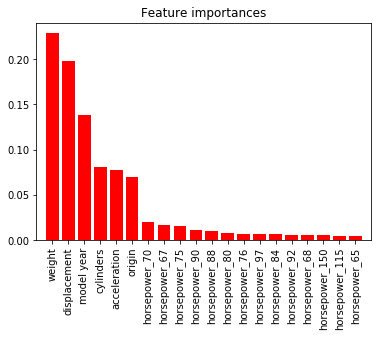

In [745]:
d_first = 20
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align = 'center', color = 'r')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation = 90)
plt.xlim([-1, d_first])

Как можно видеть, масса автомобиля самый важный параметр из представленных, что логично. Даже если мотор мощный, толкать тяжелый кузов сложно. Я ожидал, что страна происхождения повлияет больше, японские машины тех годов завоевывали авторынок как раз своим низким расходом.
Также, если посмотреть на то, какие мощностные характеристики важнее, то окажется что малая мощность позволяет точнее предсказать расход, ведь слабые двигатели обычно ставят на маленькие автомобили, которые обычно расходуют мало топлива. В свою очередь, мощный мотор отнюдь не означает большой расход, ведь он может ставится и на грузовик, и на легкий хетчбек.

# Extremely Randomized Trees

In [746]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

(0.0, 0.15833333333333333)


# AdaBoost

In [747]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)

(0.0, 0.18333333333333332)


# GBT

In [748]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)

(0.0, 0.13333333333333333)
